<a href="https://colab.research.google.com/github/oceam/agri-image/blob/main/codes/objectdetection_GWHD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLOv8を用いた小麦穂検出!
<center>
<img src=https://cdn.jsdelivr.net/gh/phytometrics/plant_phenotyping_python@main/assets/2660fe2fef4dbe05135476e36c2d9f8f33d7755f79af2850c434acd58c705f24.png width=50%>  

Global wheat project: https://www.global-wheat.com/


YOLOV8 をインストールする

In [1]:
!pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 660.5/660.5 kB 6.8 MB/s eta 0:00:00


Roboflow からデータを取得する
https://universe.roboflow.com/wei-guo/gwhd2021
resized GWHDを利用する

In [10]:
!gdown 1rrAEsKN5eUtRfEpbOEe3vKXA_-SAu6u0

Downloading...
From: https://drive.google.com/uc?id=1rrAEsKN5eUtRfEpbOEe3vKXA_-SAu6u0
To: /content/GWHD2021r416yolov8.zip
100% 334M/334M [00:01<00:00, 201MB/s]


In [11]:
!unzip GWHD2021r416yolov8.zip

ストリーミング出力は最後の 5000 行に切り捨てられました。
 extracting: train/labels/7c1c25b5ac6e0eda747cb65e3f1d8d259070c2c7ca8e6cf7aa6b60b271b41eb6_png_jpg.rf.e49f45cbf5ae7cc8ef25622a679e324f.txt  
 extracting: train/labels/7c22debb97642f1c14dfe080f5702483ec79e8e4760233ca6e57ec453fefa6bc_png_jpg.rf.39b18e0145d1e92010b457cec3917eff.txt  
 extracting: train/labels/7c3df33bc2caea4d39a1e62e807256337a7b9b6b7ba3cc00d2d65e6b20efc913_png_jpg.rf.9fc57080104bd00ec82ea9639ac4a141.txt  
 extracting: train/labels/7c48d13e684c84d2eca8a9f9b7753fa9e4cfc5e9258fc923807ac0296056b867_png_jpg.rf.0cc6de4e2d327c72d8235d0991c5bc9d.txt  
 extracting: train/labels/7c527f4366c935819acdd7f7ac01c13dc8a0f11674dc9c8b0661ffd523d9c02f_png_jpg.rf.39d5216e7d8a26f6c819c47dbe8bc63a.txt  
 extracting: train/labels/7c72e0598fdd502d960f8f56378be073c3d7707100645c8fbc7b624db39e485d_png_jpg.rf.e77622faa72d22e104e23e50421603db.txt  
 extracting: train/labels/7c8232078f224c9f61bb2e3a13c2c9759e1e41342686bb2c50defd1137316d7f_png_jpg.rf.6ee59058ae57ec5954df

In [14]:
!yolo task=detect \
  mode=train \
  model=yolov8s.pt \
  data=/content/data.yaml \
  epochs=10 \
  imgsz=416

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/data.yaml, epochs=10, patience=50, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, 

In [15]:
!yolo task=detect mode=val data="/content/data.yaml" split=test model="/content/runs/detect/train4/weights/best.pt"  #  train/val/testデータセットに対するそれぞれに対する性能評価

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/test/labels... 651 images, 10 backgrounds, 0 corrupt: 100% 651/651 [00:00<00:00, 1093.35it/s]
val: WARNING ⚠️ /content/test/images/3f3ffc173d337413326ec89f7e4c08a4b78be42cb0c9c9a54176391027ac5244_png_jpg.rf.fdc1423b61c99d327e9e40cec1efd80c.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/test/images/4a0f42bc8c8fe84352b11bece7ce9adf6e94668f4e111dc8dbfc41a5709e2c0c_png_jpg.rf.131ac2b615618964171f787e18ead73e.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/test/images/84a1f2850a036466e5dc7646e814ee910d0ce8ff49497344bcba148934d979c4_png_jpg.rf.cc063a8c5b38bd2573c718904a1e2ac9.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/test/images/8b461a21b9b01c657d41dfdf35b3607a0ab920c2cb78184c6e523391f5f3d554_png_jpg.rf.5b9270ca46b11b1352c47858689c5546.jpg: 1 duplicate labels removed
va

In [22]:
!yolo task=detect mode=predict data="/content/data.yaml" source="/content/test/images/" show_labels=False model="/content/runs/detect/train4/weights/best.pt"  #  train/val/testデータセットに対するそれぞれに対する性能評価

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/651 /content/test/images/00319488e879a811698174d9f26ef174f2f108a13e12edee5a3c50899ed26336_png_jpg.rf.6bf66bd338f131653fcd1afe20e622c0.jpg: 416x416 15 whds, 10.4ms
image 2/651 /content/test/images/00b984a8a9c1e7a275f53bc98f32b5ce980fe7b8acb484813487d081c1a76f19_png_jpg.rf.f8923d61b050077552cc8af9684ffaf9.jpg: 416x416 76 whds, 11.9ms
image 3/651 /content/test/images/0272ca52999fc76c654ce98cbdffa03a432944c157b725cbd2f867b13d12408a_png_jpg.rf.af6027f36d62333cceb1ef7112c47b8f.jpg: 416x416 54 whds, 10.4ms
image 4/651 /content/test/images/028a80f836cb89be432bdb3de9f7cf821977a72e5fa87ffc297332a7109a389a_png_jpg.rf.160dafa7c4fae196b3bd3abd82bd48d1.jpg: 416x416 58 whds, 10.4ms
image 5/651 /content/test/images/02984f94a65912641b63e9a85b23b04a6a1c542f2db588328c76c9a6b9a44d8c_png_jpg.rf.4814cd15f3d8c1e817193d2f92fd732f.jpg:

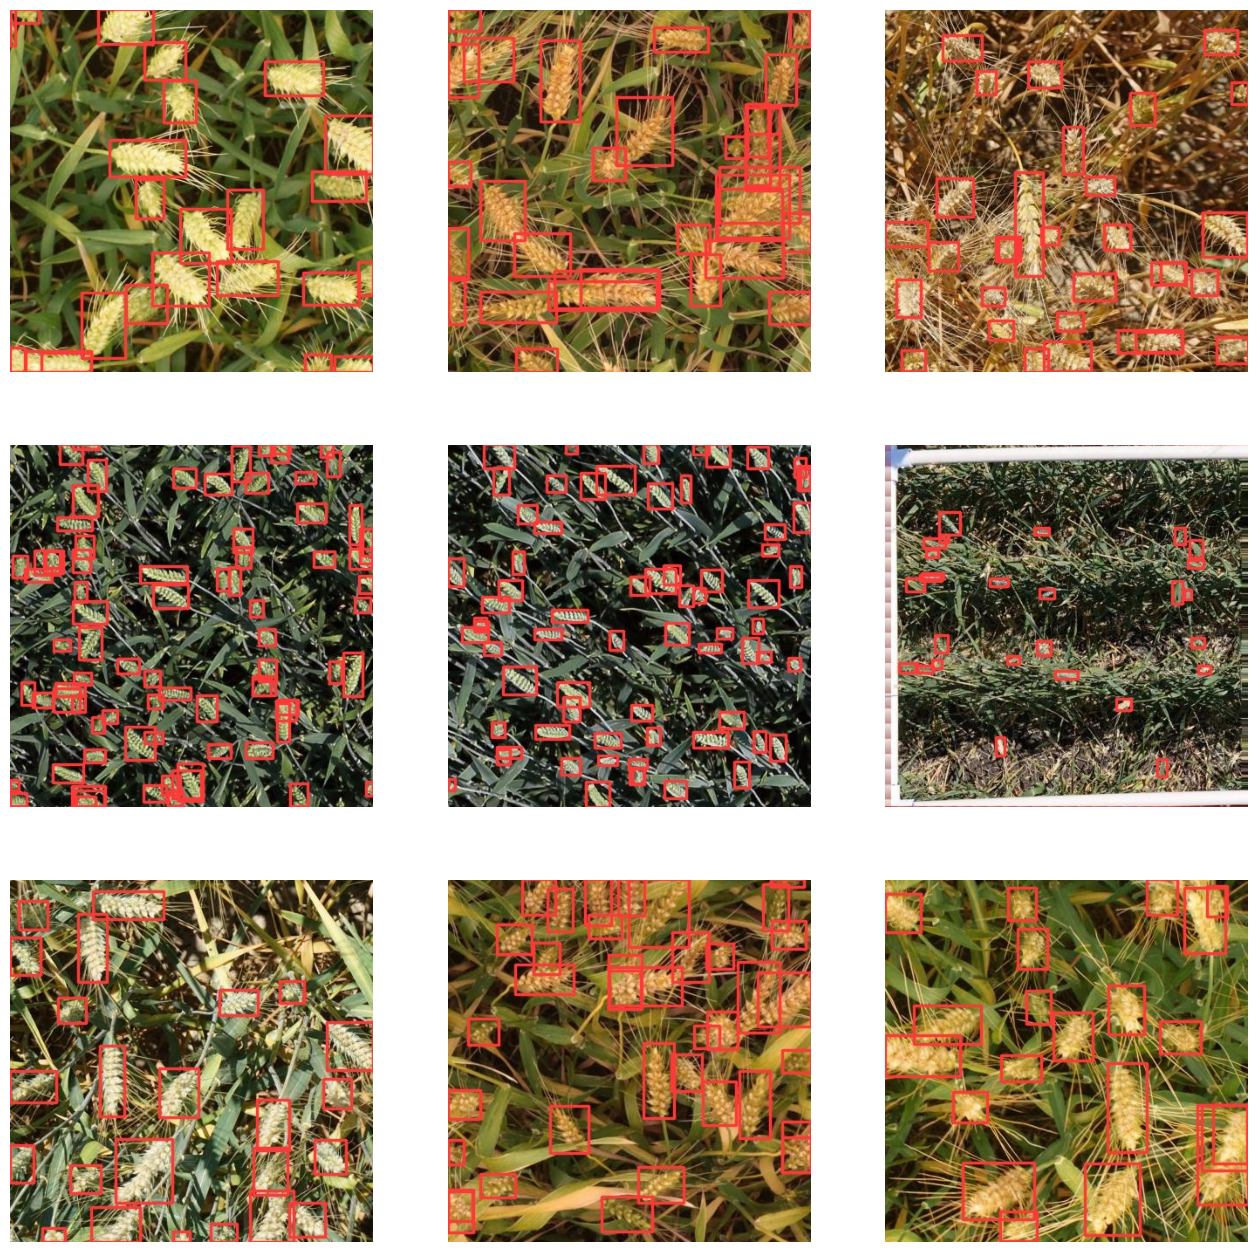

In [23]:
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
import os

pardir = "/content/runs/detect/predict"

# 9枚だけ表示します。
files = os.listdir(pardir)[:9]
N = int(np.ceil(np.sqrt(len(files))))

plt.figure(figsize=(16,16))
for i, file in enumerate(files):
    path = os.path.join(pardir, file)
    image = imread(path)
    plt.subplot(N,N, i+1)
    plt.imshow(image)
    plt.axis("off")